<a href="https://colab.research.google.com/github/samindelhi/CNN-Exercises/blob/main/Xception_Pretrained_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Xception - Extreme Inception
> Is a Deep Convolutional Neural Network Architecture that replaces Inception modules with advanced convolutions for greater efficiency and performance.



In [1]:
# Imports
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt



In [2]:
# Model Loading
# Load the pretrained Xception model
model = Xception(weights='imagenet')


91884032/91884032 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
model.summary()

Model: "xception"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 149, 149,  │        864 │ input_layer[0][0] │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 149, 149,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 149, 149,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 147, 147,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 147, 147,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 147, 147,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 147, 147,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 147, 147,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 147, 147,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 147, 147,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 147, 147,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 74, 74,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 74, 74,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 74, 74,    │        512 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 74, 74,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 74, 74,    │          0 │ add[0][0]       

 Total params: 22,910,480 (87.40 MB)

 Trainable params: 22,855,952 (87.19 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [4]:
# Prediction Function
def predict_image(mode, image_path):
  img = load_img(image_path, target_size=(299,299)) # Must be of size 299x299 as per Xception model requirement.
  img_array = img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array = preprocess_input(img_array)

  preds = model.predict(img_array)
  return decode_predictions(preds, top=3)[0]

In [5]:
import requests

def download_image(url, save_path):
  try:
    response = requests.get(url, stream=True)
    response.raise_for_status() # Raise an HTTP Error for bad responses (4xx or 5xx)
    with open(save_path, 'wb') as out_file:
      for chunk in response.iter_content(chunk_size=8192):
        out_file.write(chunk)

    print(f" Image downloaded successfully to {save_path}")
  except requests.exceptions.RequestException as e:
    print(f"Error downloading image: {e}")




 Image downloaded successfully to gibbon.jpg


 Image downloaded successfully to gibbon.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step
Top Predictions
 gibbon: 0.8975
 langur: 0.0027
 spider_monkey: 0.0026


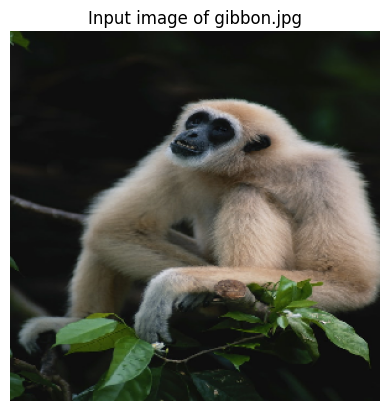

In [10]:
def download_predict_display(url, image_path):

  download_image(url, image_path)

  # Example usage

  predictions = predict_image(model, image_path)

  # Display the predictions
  print("Top Predictions")
  for class_id, description, score in predictions:
    print(f" {description}: {score:.4f}")

  # Display the image
  plt.imshow(load_img(image_path, target_size=(299,299)))
  plt.axis('off')
  plt.title(f'Input image of {image_path}')
  plt.show()

download_predict_display("https://plus.unsplash.com/premium_photo-1664302802571-bd0191256f25?ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&q=80&w=687", 'gibbon.jpg')

 Image downloaded successfully to Owl.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step
Top Predictions
 great_grey_owl: 0.6013
 kite: 0.1116
 hen: 0.0158


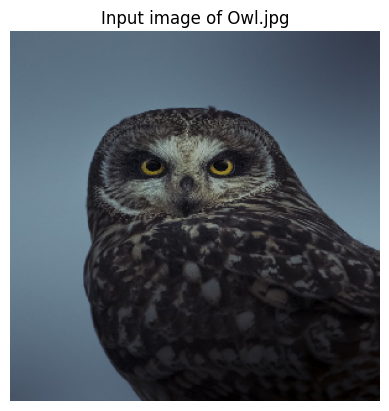

 Image downloaded successfully to Girl.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step
Top Predictions
 assault_rifle: 0.1087
 rifle: 0.0778
 pickelhaube: 0.0322


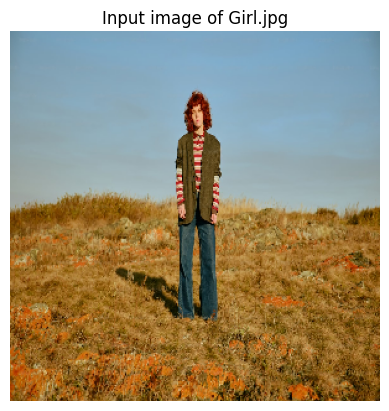

 Image downloaded successfully to Elephant.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step
Top Predictions
 African_elephant: 0.8508
 tusker: 0.0449
 Indian_elephant: 0.0354


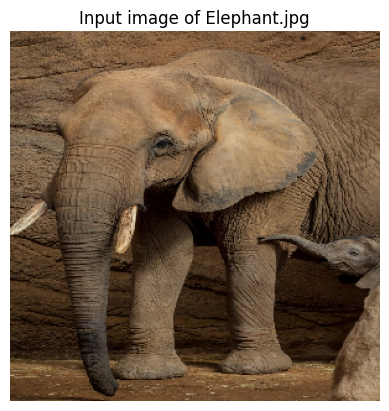

 Image downloaded successfully to Man.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step
Top Predictions
 sunglasses: 0.6650
 sunglass: 0.2936
 jersey: 0.0051


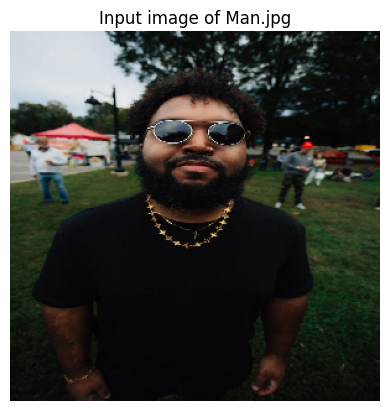

In [13]:
download_predict_display("https://images.unsplash.com/photo-1759403415493-8da7b795dbfe?ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&q=80&w=764", 'Owl.jpg')
download_predict_display("https://plus.unsplash.com/premium_photo-1760269683035-dbe03167d073?ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&q=80&w=1170", 'Girl.jpg')
download_predict_display("https://images.unsplash.com/photo-1759697421244-1710c7a6f924?ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&q=80&w=687","Elephant.jpg")
download_predict_display("https://images.unsplash.com/photo-1760411069721-60d7c378b697?ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&q=80&w=687","Man.jpg")


 Image downloaded successfully to man_standing.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 659ms/step
Top Predictions
 spotlight: 0.3326
 sweatshirt: 0.1356
 jersey: 0.0288


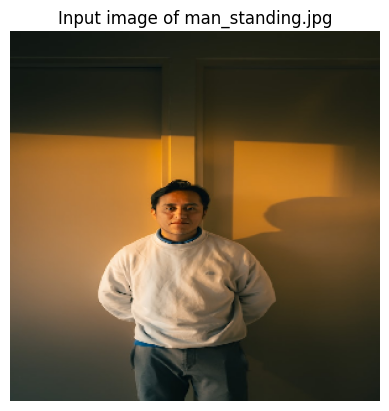

In [14]:
download_predict_display("https://images.unsplash.com/photo-1760402994280-97859caf0e54?ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&q=80&w=687", "man_standing.jpg")